# Influence of 3-Point Shots in the NBA 

# Introduction:
Our project will be focusing on the NBA's (National Basketball Association) three-point shooting data. The NBA established the three-point line back in 1979, but over time with the arrival of players such as Steph Curry and Klay Thompson, members of the Golden State Warriors Championship Dynasty, who are proclaimed the “Splash Brothers” because of their efficient prowess of shooting threes. Over the last few years, the 3-point shot has become the most coveted shot in NBA history. The goal of this project is to analyze if this brand of basketball leads to successful NBA play, and if general managers should learn more about three point shooters when drafting, or signing players for their roster.
    
Since our project focuses on three-point shooting data, we wanted to find the data that shows us the statistics of the three-point shot from teams, as well as the effect that it had on their wins. So we first found on Kaggle, three-point shooting data for all teams from 1996-2020. But for this project, we will only be looking at data starting from 2013 to 2020 to have a more recent subset of data for basketball. The data holds every team's 3-point attempts (3PA), 3-point percentage (3P%), and 3P% share in total points(percentage of 3’s accounted for the team's total points). Our second source comes from the ESPN website which holds the winning percentages (the percentage of games that each team won per season). Our goal will be to merge the two datasets so that we can have the three-point data along with the winning percentages of teams per season in the same data frame.
    
Our motivation for this goal is that many of us in this group are big fans of sports. Not to mention that the NBA playoffs are currently going on right now. So we decided to choose a topic that can incorporate analyzing something that we are all interested in such as basketball. Since the three-point shot has been used so heavily nowadays, we wanted to analyze if it has actually been helping teams or not in generating success as in wins. We hope that this project not only helps recruiters in basketball understand to what degree is the three-point shot important in basketball but also gives insight to those that do not follow basketball information about the shot.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Methods:

Our first step was web scrapping our ESPN data into a csv file so that we could perform data cleaning and use it for merging with our 3-point shooting dataset. The code is designed to send an HTTP GET request to the site’s API and retrieve all the data. It looped through all the years and scraped the data using Beautiful Soup. The way this was done was that it looped through all the rows for each year and extracted the data. Once it did that, it wrote them to an output file called ‘win percentage.csv’. The table would include the names and win percentages with the years as column names. We would later have to rework the data so that it contained a column for the years.

We had trouble at first trying to structure the winning percentage how we wanted it. The structure that we needed it to be in to match the winning percentage data required the data to not only have years as a single column but percentages as well. To accomplish this, we changed the data from a wide to a long format. Then a groupby() was necessary to group the data by team names. Afterward, a for-loop was needed to structure each team in the format we wanted one at a time and then appended that data into a new data frame that we called win_df.

When combining the datasets we realized that the win percentage csv file had extra data for dates that were not in the NBA 3-point shooting data csv file. Those dates were 2021, 2022, and 2023. We dropped those dates to merge the two datasets and also we already knew that what we were trying to convey through the datasets did not need those dates. Another big issue we had was getting the columns to match each other so we then had to change the column names of teams in both df so that the names match each other. For example the win percentage or final data frame has LA, instead of saying LA Lakers, and we needed that to match with our 3pt data frame. Once the cleaning was done for each data frame, we decided to merge the data frames by team and year. We also added the “Win %” column to the new merge data frame called “Test”. When combining the two data frames we wanted to specify the two column names ‘Team’ and ‘Year’. To use those specific column names we used the “on” param of the merge method.

To  find the answer to our topic, we utilized two main types of visualizations that would best reflect the data, a bar graph, and a line graph. We utilized line graphs to determine if the percentage of 3-point shots made for each team was contingent on the winning percentage of that season. We also created bar graphs to depict the percentage of 3-point shots made for the top 5 teams for each season to help visualize what teams would outperform the other teams in consecutive seasons and had a streak. Another bar graph we created displayed all 30 teams' 3-point shot attempts in which only the season 2013-2014 and 2019-2020 were used to compare what teams attempted a 3-point shot and from that data, we can make inferences behind how attempting more shots can increase the winning percentage of a team.



In [2]:
# Importing 3 PT summary information
nba_shots = pd.read_csv('NBA3ptShootingData(13-20).csv')
nba_shots

,Teams,Year,3PM,3PA,3P%,3P% share in Total Points,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,NaN,NaN,NaN,NaN,NaN
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,NaN,NaN,NaN,NaN,NaN
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,NaN,NaN,NaN,NaN,NaN
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,NaN,NaN,NaN,NaN,NaN
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
205,New Orleans Pelicans,2015-16,8.6,23.8,36.0,25.10,NaN,NaN,NaN,NaN,NaN
206,New Orleans Pelicans,2016-17,9.4,26.8,35.0,27.00,NaN,NaN,NaN,NaN,NaN
207,New Orleans Pelicans,2017-18,10.2,28.2,36.2,27.40,NaN,NaN,NaN,NaN,NaN
208,New Orleans Pelicans,2018-19,10.3,29.9,34.4,26.80,NaN,NaN,NaN,NaN,NaN


First we have to perform some level 1 data cleaning.

In [3]:
nba_shots = nba_shots.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
nba_shots = nba_shots.rename(columns={'Teams': 'Team'})
nba_shots

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,New Orleans Pelicans,2015-16,8.6,23.8,36.0,25.10
206,New Orleans Pelicans,2016-17,9.4,26.8,35.0,27.00
207,New Orleans Pelicans,2017-18,10.2,28.2,36.2,27.40
208,New Orleans Pelicans,2018-19,10.3,29.9,34.4,26.80


In [4]:
rename_years_dict = {'2013-14': '2014',
    '2014-15': '2015',
    '2015-16': '2016',
    '2016-17': '2017',
    '2017-18': '2018',
    '2018-19': '2019',
    '2019-20': '2020'}

nba_shots['Year'] = nba_shots['Year'].replace(rename_years_dict)
nba_shots

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2014,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2015,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2016,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2017,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2018,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,New Orleans Pelicans,2016,8.6,23.8,36.0,25.10
206,New Orleans Pelicans,2017,9.4,26.8,35.0,27.00
207,New Orleans Pelicans,2018,10.2,28.2,36.2,27.40
208,New Orleans Pelicans,2019,10.3,29.9,34.4,26.80


In [5]:
# Importing win percentage summary
nba_wins = pd.read_csv('win percentage.csv')
nba_wins =  nba_wins.drop(nba_wins.index[0])
nba_wins = nba_wins.rename(columns={'TEAMS': 'Team'})
nba_wins.head()

,Team,2014 Win %,2015 Win %,2016 Win %,2017 Win %,2018 Win %,2019 Win %,2020 Win %,2021 Win %,2022 Win %,2023 Win %
1,San Antonio,.756,.671,.817,.744,.573,.585,.451,.458,.415,.268
2,Oklahoma City,.720,.549,.671,.573,.585,.598,.611,.306,.293,.488
3,LA,.695,.683,.646,.622,.512,.585,.681,.653,.512,.537
4,Houston,.659,.683,.500,.671,.793,.646,.611,.236,.244,.268
5,Portland,.659,.622,.537,.500,.598,.646,.473,.583,.329,.402


In [6]:
nba_wins = nba_wins.drop(columns = [ "2021 Win %" , "2022 Win %" , "2023 Win %"])

In [7]:
# changing data frame from wide to long
melted_df = pd.melt(nba_wins, id_vars=['Team'], var_name='Year', value_name='Win %')
melted_df

,Team,Year,Win %
0,San Antonio,2014 Win %,.756
1,Oklahoma City,2014 Win %,.720
2,LA,2014 Win %,.695
3,Houston,2014 Win %,.659
4,Portland,2014 Win %,.659
...,...,...,...
205,Detroit,2020 Win %,.303
206,Boston,2020 Win %,.667
207,Orlando,2020 Win %,.452
208,Philadelphia,2020 Win %,.589


In [8]:
# Grouping by team
grouped_df = melted_df.groupby('Team')
# empty data set to later fill in the data with
win_df = pd.DataFrame(columns=['Team', 'Year', 'Win %'])
grouped_df.head()

,Team,Year,Win %
0,San Antonio,2014 Win %,.756
1,Oklahoma City,2014 Win %,.720
2,LA,2014 Win %,.695
3,Houston,2014 Win %,.659
4,Portland,2014 Win %,.659
...,...,...,...
145,Detroit,2018 Win %,.476
146,Boston,2018 Win %,.671
147,Orlando,2018 Win %,.305
148,Philadelphia,2018 Win %,.634


In [9]:
#for loop to put a specific win percentage each year in temp_df
#Then append it to win_df to get each team one at a time
for team, group in grouped_df:
    temp_df = pd.DataFrame({
        'Team': [team] * len(group),
        'Year': group['Year'],
        'Win %': group['Win %']
    })   
    win_df = pd.concat([win_df, temp_df])

win_df = win_df.reset_index(drop=True)
win_df

,Team,Year,Win %
0,Atlanta,2014 Win %,.463
1,Atlanta,2015 Win %,.732
2,Atlanta,2016 Win %,.585
3,Atlanta,2017 Win %,.524
4,Atlanta,2018 Win %,.293
...,...,...,...
205,Washington,2016 Win %,.500
206,Washington,2017 Win %,.598
207,Washington,2018 Win %,.524
208,Washington,2019 Win %,.390


In [10]:
win_df["Year"]= win_df["Year"].str.replace(" Win %", "")
win_df.head(10)

,Team,Year,Win %
0,Atlanta,2014,.463
1,Atlanta,2015,.732
2,Atlanta,2016,.585
3,Atlanta,2017,.524
4,Atlanta,2018,.293
5,Atlanta,2019,.354
6,Atlanta,2020,.299
7,Boston,2014,.305
8,Boston,2015,.488
9,Boston,2016,.585


In [11]:
#Sorts the teams by states to make sure they're represented
main = win_df.sort_values(by=['Team'])
nba_teams_dict = {'Atlanta': 'Atlanta Hawks',
    'Boston': 'Boston Celtics',
    'Brooklyn': 'Brooklyn Nets',
    'Charlotte': 'Charlotte Hornets',
    'Chicago': 'Chicago Bulls',
    'Cleveland': 'Cleveland Cavaliers',
    'Dallas': 'Dallas Mavericks',
    'Denver': 'Denver Nuggets',
    'Detroit': 'Detroit Pistons',
    'Golden State': 'Golden State Warriors',
    'Houston': 'Houston Rockets',
    'Indiana': 'Indiana Pacers',
    'LA': 'Los Angeles Clippers',
    'LA Lakers': 'Los Angeles Lakers',
    'Memphis': 'Memphis Grizzlies',
    'Miami': 'Miami Heat',
    'Milwaukee': 'Milwaukee Bucks',
    'Minnesota': 'Minnesota Timberwolves',
    'New Orleans': 'New Orleans Pelicans',
    'New York': 'New York Knicks',
    'Oklahoma City': 'Oklahoma City Thunder',
    'Orlando': 'Orlando Magic',
    'Philadelphia': 'Philadelphia 76ers',
    'Phoenix': 'Phoenix Suns',
    'Portland': 'Portland Trail Blazers',
    'Sacramento': 'Sacramento Kings',
    'San Antonio': 'San Antonio Spurs',
    'Toronto': 'Toronto Raptors',
    'Utah': 'Utah Jazz',
    'Washington': 'Washington Wizards'}

main['Team'] = main['Team'].replace(nba_teams_dict)
main

,Team,Year,Win %
0,Atlanta Hawks,2014,.463
1,Atlanta Hawks,2015,.732
2,Atlanta Hawks,2016,.585
3,Atlanta Hawks,2017,.524
4,Atlanta Hawks,2018,.293
...,...,...,...
204,Washington Wizards,2015,.561
205,Washington Wizards,2016,.500
206,Washington Wizards,2017,.598
207,Washington Wizards,2018,.524


In [12]:
test = pd.merge(nba_shots, main, on=['Team','Year']) 
test['Win %'] = pd.to_numeric(test['Win %'])
test['Win %'] = test["Win %"] * 100

In [13]:
test.head()

,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win %
0,Atlanta Hawks,2014,9.4,25.8,36.3,27.93,46.3
1,Atlanta Hawks,2015,10.0,26.2,38.0,29.30,73.2
2,Atlanta Hawks,2016,9.9,28.4,35.0,28.90,58.5
3,Atlanta Hawks,2017,8.9,26.1,34.1,25.90,52.4
4,Atlanta Hawks,2018,11.2,31.0,36.0,32.50,29.3


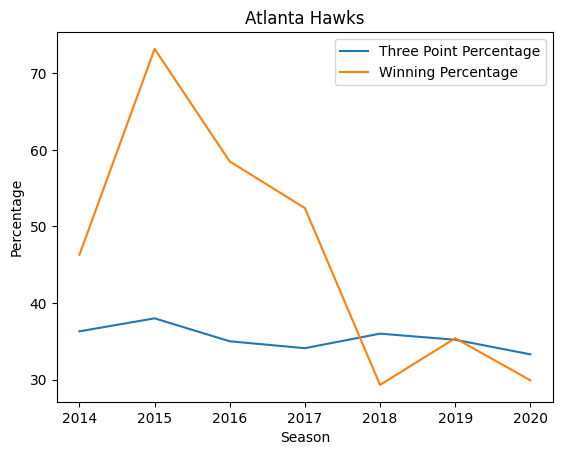

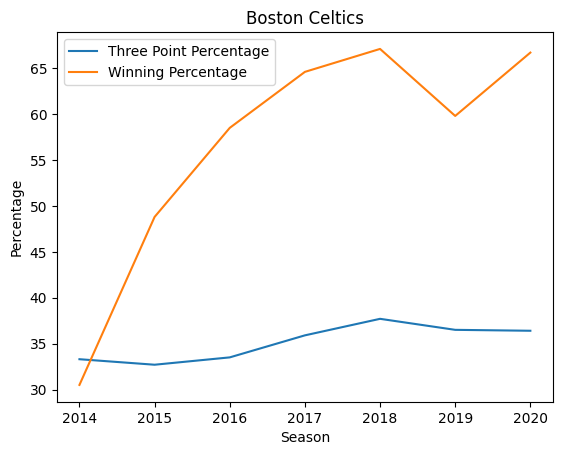

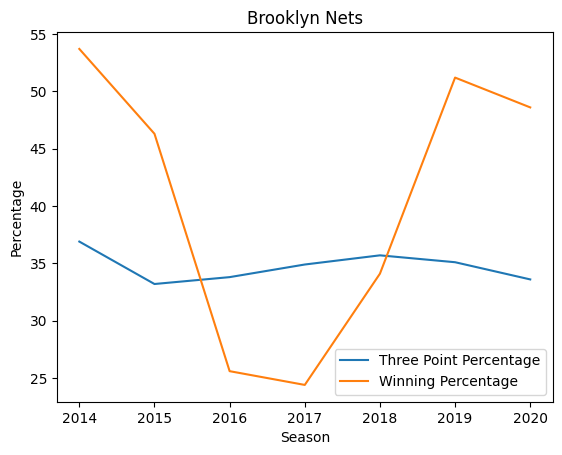

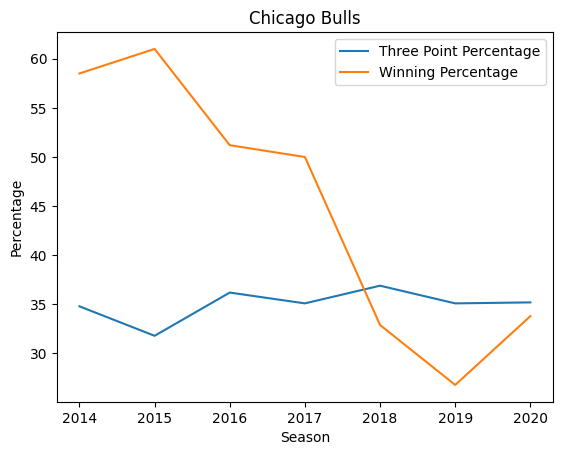

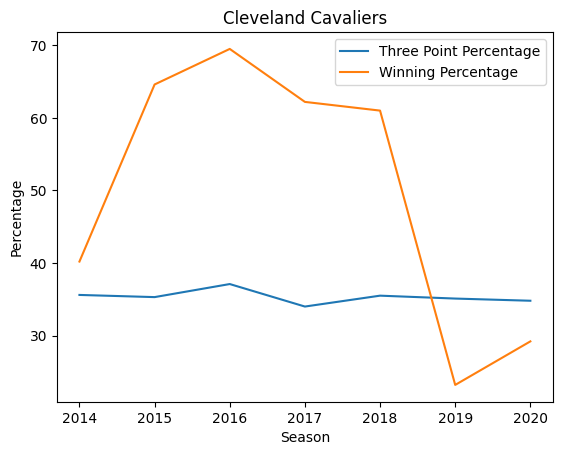

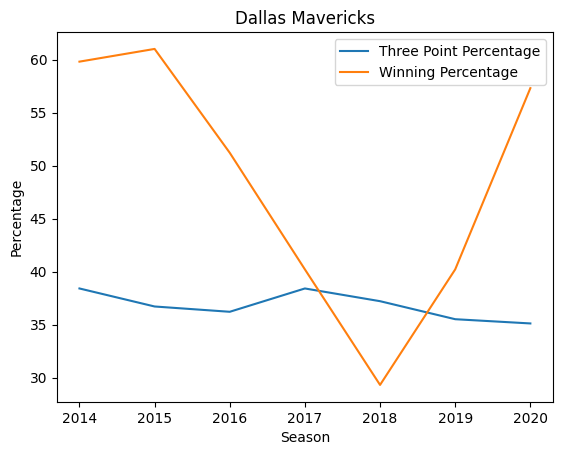

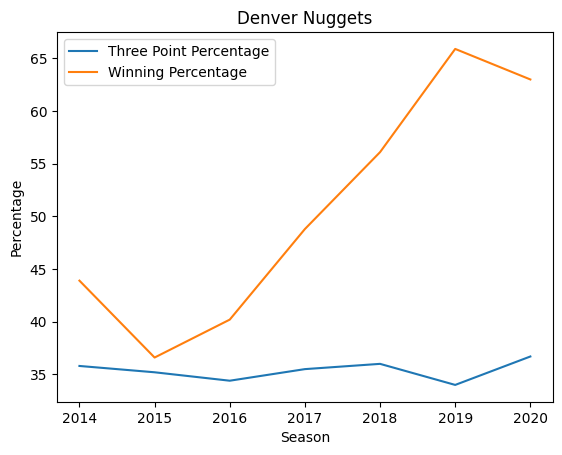

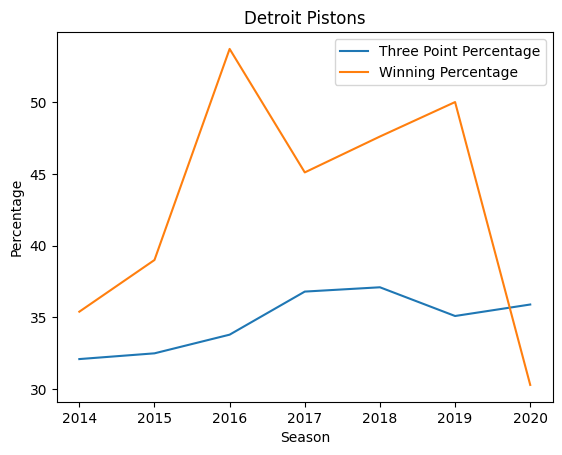

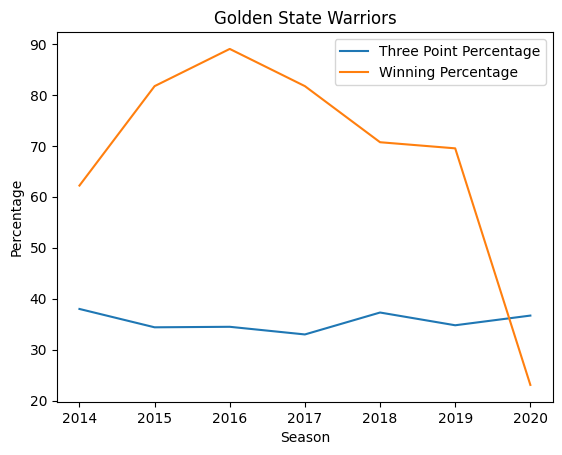

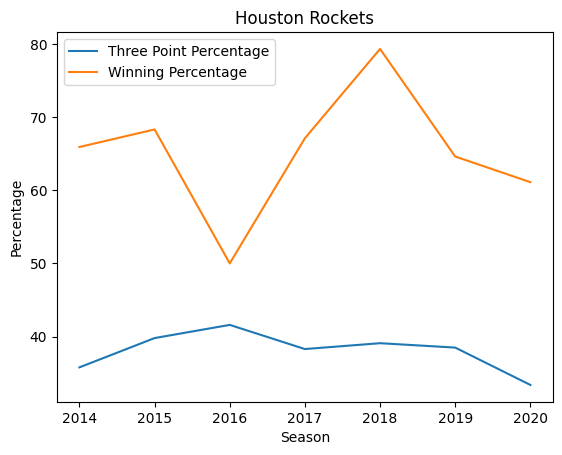

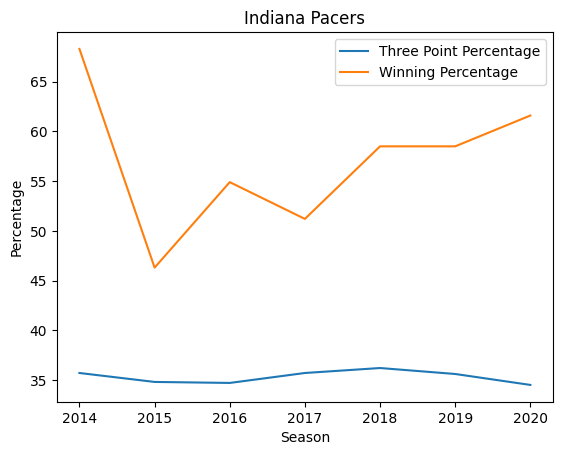

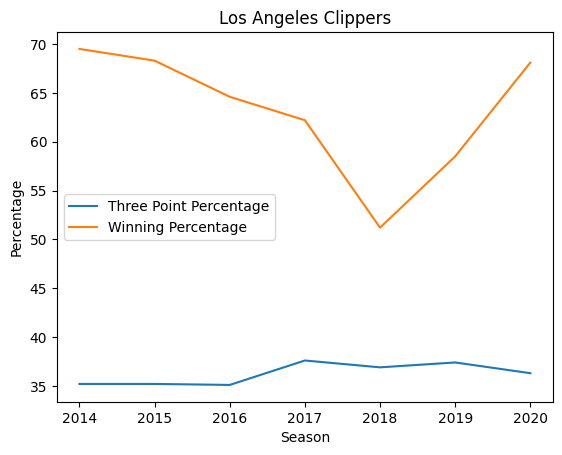

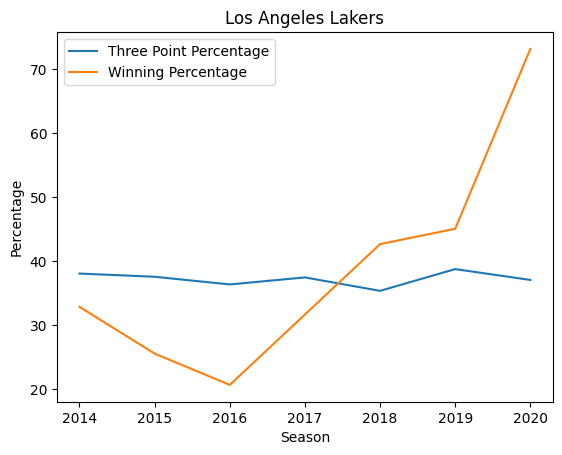

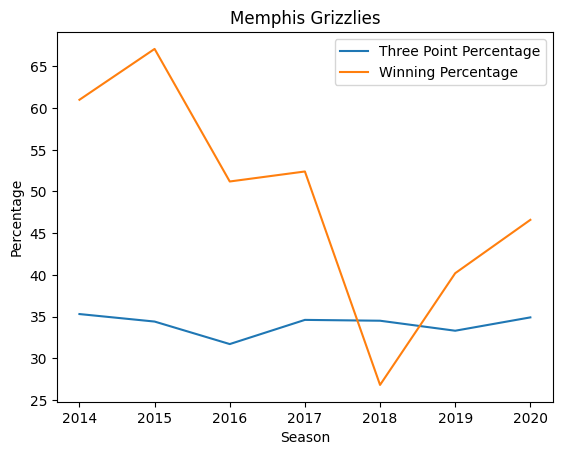

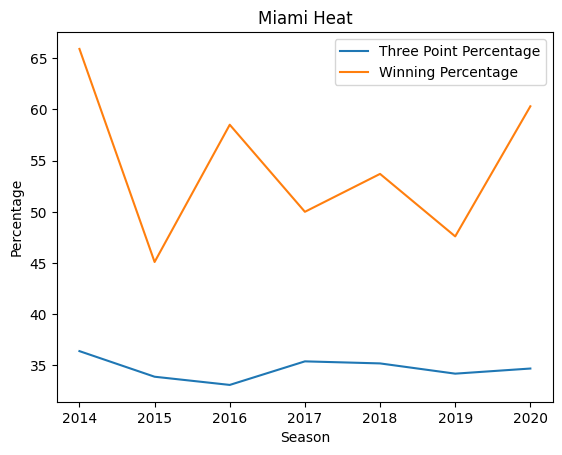

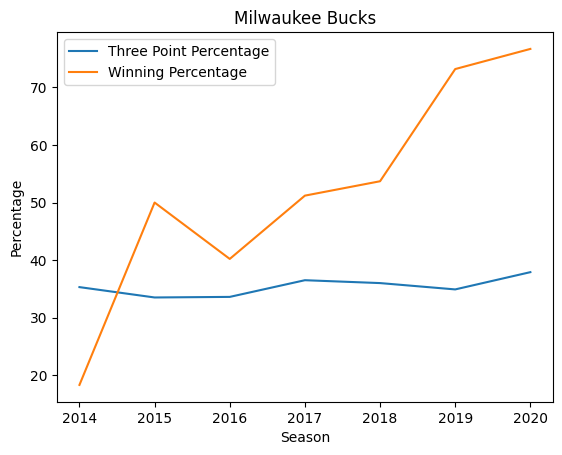

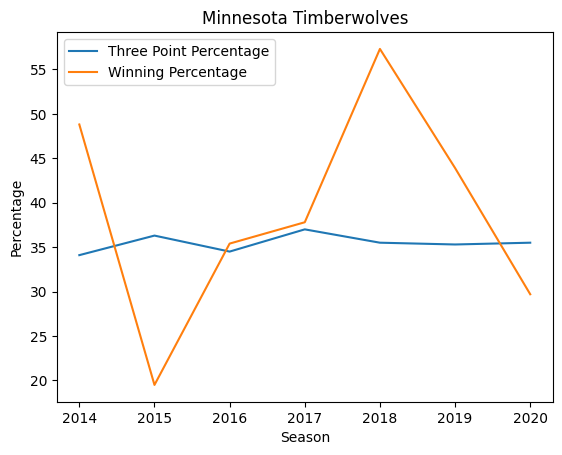

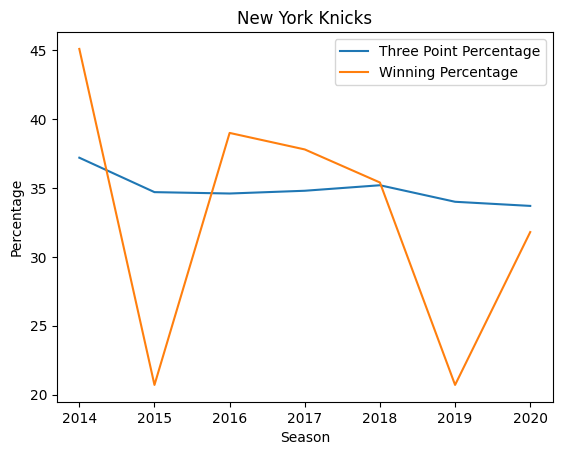

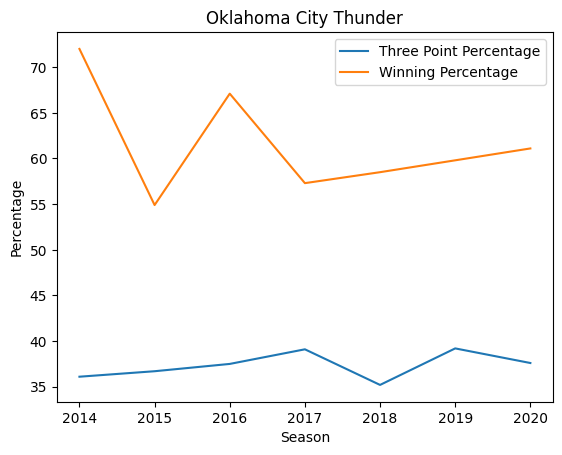

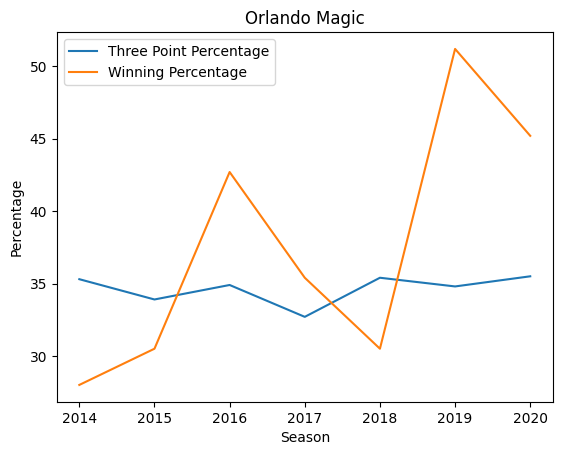

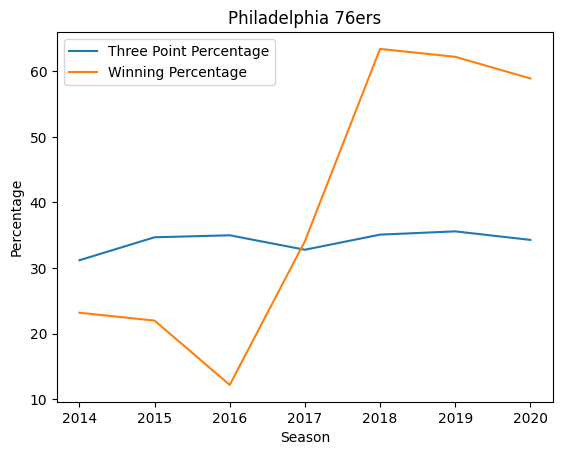

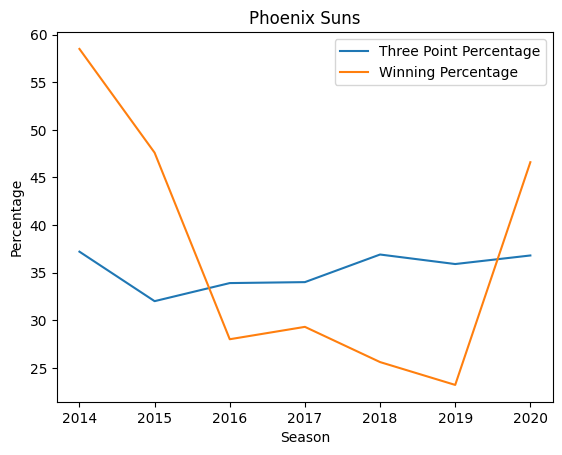

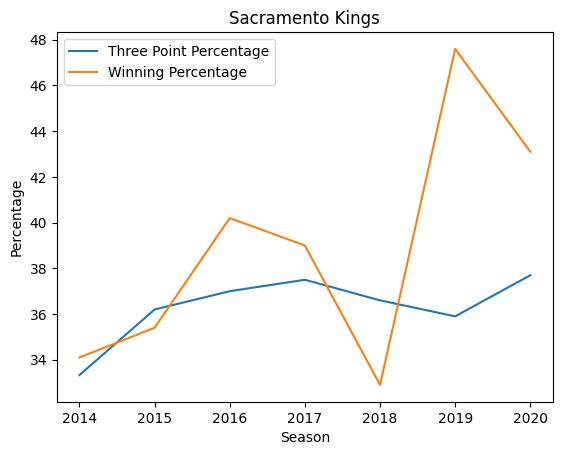

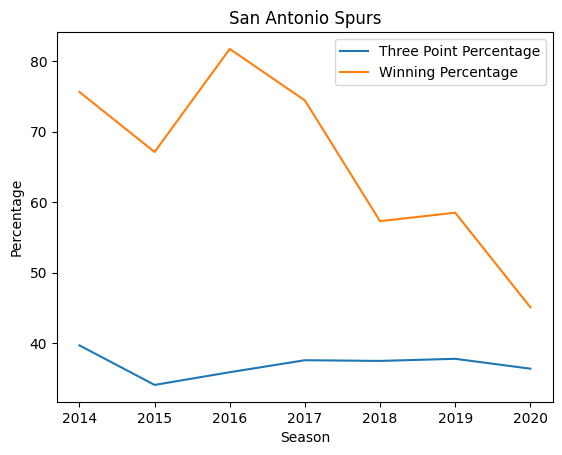

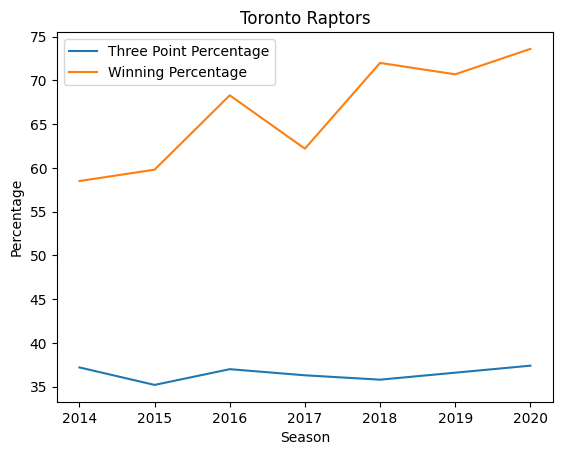

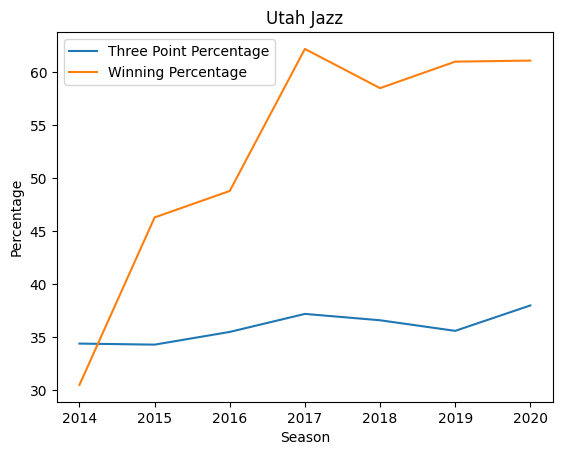

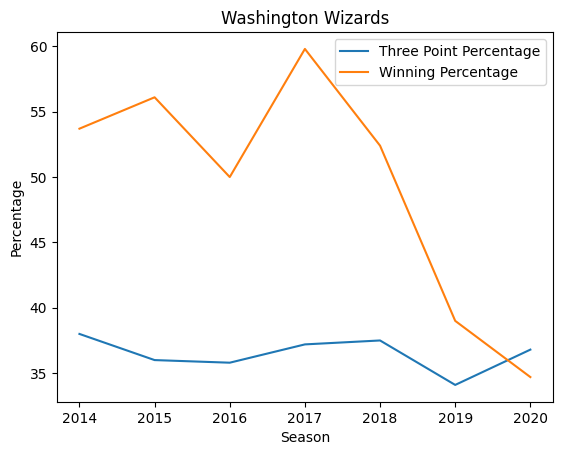

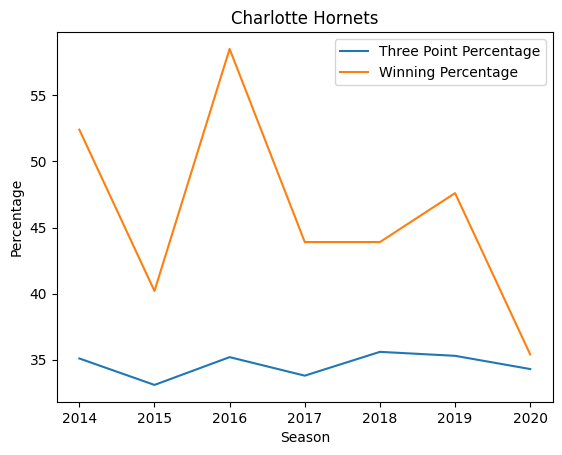

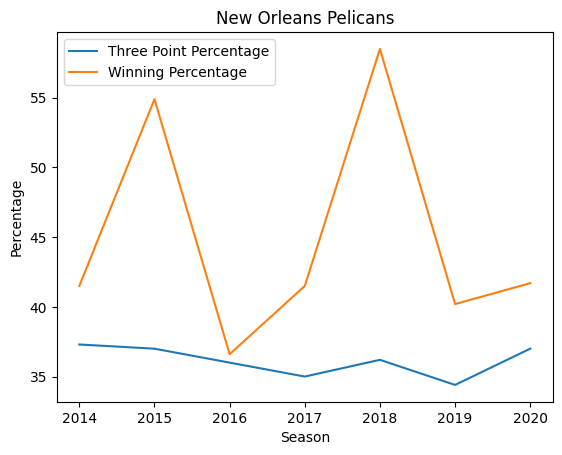

In [14]:
# Displays Visualizations of 3-Point Percentage v.s. Winning Percentage for each team by season(Year)

for team in  test['Team'].unique():

    team_data = test[test['Team'] == team]


    x = team_data['Year']
    y1 = team_data['3P%']
    y2 = team_data['Win %']


    fig, ax = plt.subplots()


    ax.plot(x, y1, label='Three Point Percentage')
    ax.plot(x, y2, label='Winning Percentage')


    ax.set_title(team)
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()


Text(0.5, 1.0, 'NBA Pct')

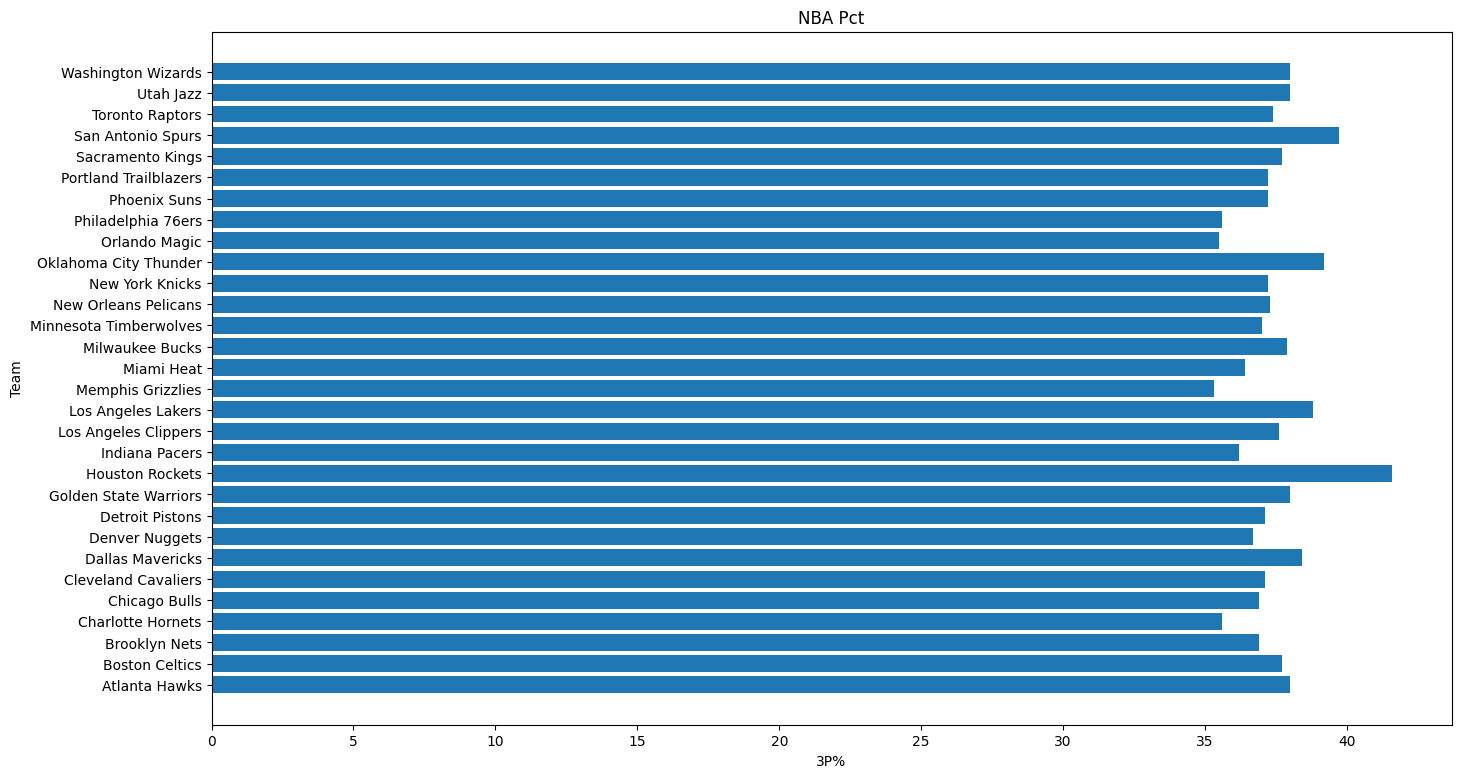

In [ ]:
#Displays 3-Point attempts for each team in the Year 2013 and 2020
szns_comp = test[test['Year'].isin(['2013-14', '2019-20'])]
group3PA = szns_comp.groupby(['Year', 'Team'])['3PA'].sum().reset_index()
attempts = group3PA.pivot(index='Team', columns='Year', values='3PA')
attempts.plot(kind='barh')
plt.xlabel('Total 3-Point Attempts')
plt.title('Total 3-Point Attempts by Team in 2013 and 2020')
plt.show()

##  Top Five Shooting Teams 2016-2020

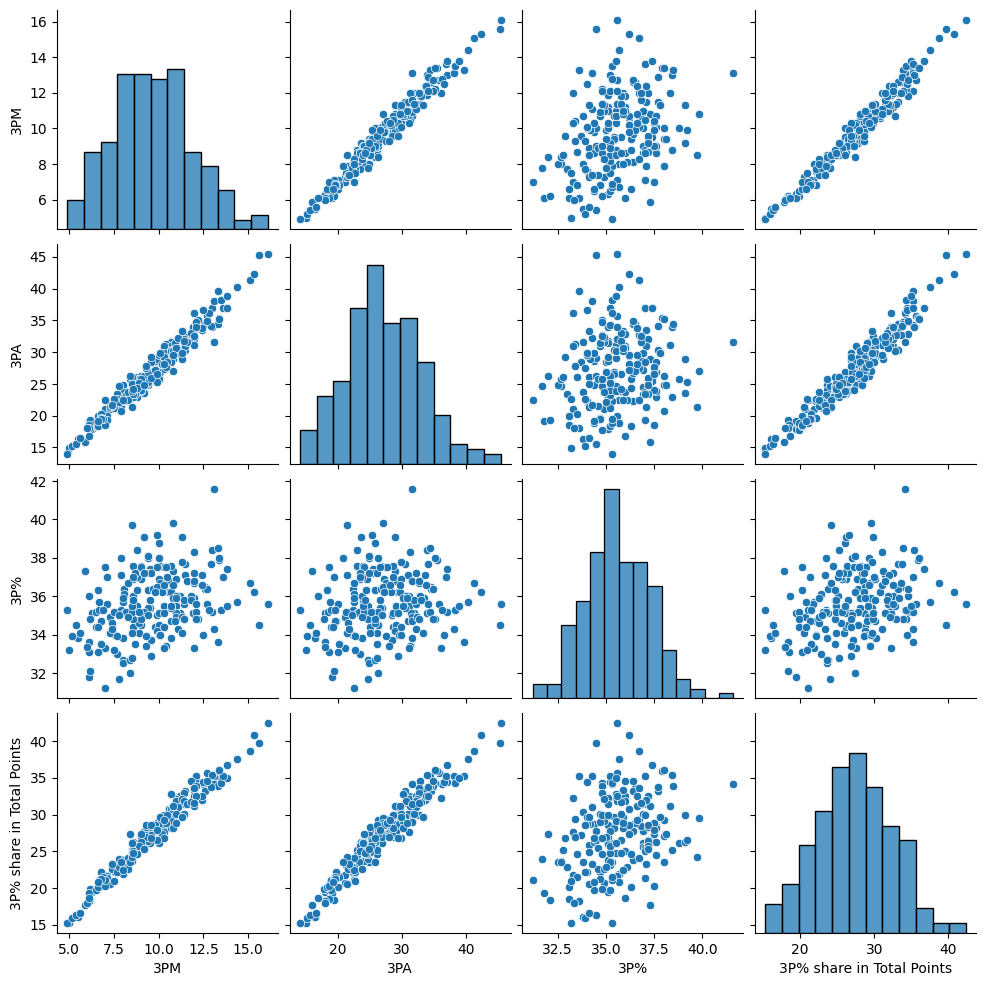

In [ ]:
# filter for seasons 2016-2020
szns = test[test['Year'].isin(['2016-17', '2017-18', '2018-19', '2019-20'])]

# Group by year, team, and calculate the average 3-point percentage for each group
best_shooting_teams = test.groupby(['Year', 'Team'])['3P%'].mean().reset_index()

# Sort the data by year and 3-point percentage in descending order
top_5 = best_shooting_teams.sort_values(['Year', '3P%'], ascending=[True, False]) #year = True, #3P% = False

#color dict
team_colors = {
    'Golden State Warriors': 'yellow',
    'Houston Rockets': 'red',
    'San Antonio Spurs': 'black',
    'Toronto Raptors': 'darkred',
    'Boston Celtics': 'green',
    'Oklahoma City Thunder': 'orange',
    'Los Angeles Clippers': 'blue',
    'Utah Jazz': 'navy',
    'Dallas Mavericks': 'gray',
    'Washington Wizards': 'darkblue',
    'Sacramento Kings': 'purple',
    'Los Angeles Lakers': 'gold',
    'Milwaukee Bucks': 'darkgreen'}


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))

# For each year, select the top 5 teams with the highest 3-point percentage and plot
for i, Year in enumerate(['2016-17', '2017-18', '2018-19', '2019-20']):
    nba_year = top_5[top_5['Year'] == Year].head(5)
    colors = {Team: team_colors[Team] for Team in nba_year['Team'].unique()}
    nba_year.plot(kind='bar', x='Team', y='3P%', ax=axes[i], legend=False, color=[team_colors[t] for t in nba_year['Team']])
    axes[i].set_title(Year)
    axes[i].set_xlabel('3-Point Percentage')
    axes[i].set_ylabel('')
    axes[i].invert_xaxis()
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    
plt.tight_layout()
plt.show()








# Results: 
To find the answer to our topic, we utilized two main types of visualizations that would best reflect the data, a bar graph, and a line graph. We utilized line graphs to determine if the percentage of 3-point shots made for each team was contingent on the winning percentage of that season.  For instance,the top 5 teams of the 2018-2019 season: San Antonio Spurs, Houston Rockets, Los Angeles Lakers, and Oklahoma City Thunder. After visualizing the line graph we made an analysis of each team during that season which is as stated: The San Antonio Spurs’ 3-point percentage had a decrease which resulted in a sharp decline in Winning Percentage for the 2018-2019 season. In Comparison to the Los Angeles Clippers 2018-2019 season they had a constant increase in 3-percentage which resulted in an increase for Winning Percentage. From that analysis we deduced that, as the frequency of 3-point shots increases so does the Winning Percentage.
 
We also created bar graphs to depict the percentage of 3-point shots made for the top 5 teams for each season to help visualize what teams would outperform the other teams in consecutive seasons and had a streak. In the seasons of 2016-2019 we found that the Houston Rockets had a 3 year  streak of place within the top 5 teams for each season for 3 point shots made. With that in mind, we took a look at their line graph for 3-point percentage v.s. Winning Percentage which did indicate that our analysis from earlier was correct as 3-point percentage constantly increases so does Winning Percentage. Another bar graph we created displayed all 30 teams' 3-point shot attempts in which only the season 2013-2014 and 2019-2020 were used to compare what teams attempted a 3-point shot and from that data, we can make inferences behind how attempting more shots can increase the winning percentage of a team.


# Discussion:
The three-point shot was introduced in the NBA during the 1979-20 season and was not heavily utilized by teams at the magnitude it is today. Coaches, players, and fans will argue that the NBA's three-point line rose to ascension post-2010. For example, we saw teams like the Miami Heat running a 5-out offense with 6'11 PF/Center Chris Bosh playing outside of the paint and shooting three-pointers, or the Cleveland Cavaliers running a 5-out offense with PF/Center Kevin Love hovering around the perimeter and shooting three-pointers. While the NBA had standout players pre-2010 such as Dirk Nowitzki, Peja Stojakovic, Ray Allen, Reggie Miller, Larry Bird, and other exceptional three-point shooters, the league simply never saw the game transform like this. At the helm of it all is 6'2 guard Stephen Curry, along with the Golden State Warriors who revolutionize how the three-point shot was valued. During fastbreaks, teams stopped taking layups and dunks with a man advantage but instead stopped at the 3-point line to launch a 22-ft shot. Soon we saw a shift of teams prioritizing floor spacing over defense, three-pointers over twos, and the value of traditional big men and point guards decreased. If you were a sub-par shooter, a sub-par defender, or a combination of both -- you could see yourself out of the league fast. Some teams value players only for their shooting, even if they don't contribute anywhere else, because shooting basketball is a highly sought-after skill.

The three-point shot has an incredible hold on the NBA regarding scoring and the game's analytics. With teams incorporating more advanced analytics into their game plans, we've seen how teams have shifted to prioritize the three-point shot in their offense. Since the 2013-14 season up to the 2019-20 season, the Golden State Warriors, arguably the team that excels at three-point shooting, has finished in the top five of three-point field goals made five out of seven seasons. Stephen Curry, the all-time leader in three-pointers made with 3,390 and counting, had an NBA record 402 threes made in a season in the 2015-16 season. In addition, since 2013-14, the Golden State Warriors were able to win three championships within the scope of our research, and four if you account for the present time. Now you may ask, what is the significance of this information? The significance is teams have tried to copy the blueprint of the Golden State Warriors, recruiting more shooters on their teams, drafting shooters from college, and taking more three-point attempts as a team in attempts to compete with the Warriors. The prominence of the three-point shot has opened up teams' offenses, while also increasing the output of teams' scoring. Teams are taking more three-pointers than ever before. In the 2019-20 season, the most three-pointers attempted by a team was 45.3 attempts, if you scale back just two years before the 2017-18 season, that number turns to 41.9 attempts per game. That is around 3 more three-point attempts on average taken from two league leaders from different seasons and a difference of 9 points. 

In regards to our goal, unraveling the truths of whether three-point shooting has a significant effect on a team's success (measured by winning) could also allow us to assess the impact of three-point shooting on player recruitment, player signings, and draft behaviors. Understandably, finding out the contributions three-point shooting has on teams' winning is only one part of the puzzle, however, it is research that still yields tons of insight. Three-point shooting can lead to increased scoring since the three-point shot is worth more than a regular field goal which is worth two and a free throw that is worth one point. Teams who have players that can consistently make three-point shots above the league average have the luxury of scoring more points per possession, leading to more overall points scored and potentially more wins. In terms of spacing, when a team has players who can shoot from outside the paint, it creates more spacing on the court. This gives players the freedom to move around areas on the court and opens up the paint for players to drive or create scoring opportunities for teammates through penetration. In addition, the fear of the three-point shot, especially in close games, lead to an increase in fouls committed by the opposing team. Aggressive close-outs on shooters can lead to a four-point play where the three-point shooter takes and makes the field goal and earns a trip to the free throw line for one more scoring opportunity. Overall, having players who can make three-point shots consistently can help a team score more points, create better spacing, gain momentum, and draw fouls, all of which can contribute to increased winning chances. Therefore, we could expect teams to draft, sign players, or cater to players who have a high competency in shooting in this modern-day, high-scoring era of the NBA


# Limitations:    
As with many analyses, there are limitations that we had on our dataset. One limitation is that the data does not account for how in certain years the number of games played a season is different. For example, lockout seasons in which players protested and did not play a full season, or the shortened seasons due to the pandemic in 2020.

Another limitation is that our data only looks at three-point percentages, perhaps we could see a difference if we compared different aspects of the game such as comparing field goal percentages and three-point percentages, or even see if we could find free throw shooting data and see if the change of skill in players as far as three points shooting over the years increased the shooting ability of players over a such as running an analysis between three-point and free throw shooting to see if the three-point shooting has affected that in any way.

# Conclusion:
